In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning /Practice-Projects/Machine-Error-Classification/machine_failure_dataset.csv")
print(data.head(10))
print(data.info())

   Temperature  Vibration  Power_Usage   Humidity Machine_Type  Failure_Risk
0    74.967142  56.996777     8.649643  20.460962         Mill             1
1    68.617357  54.623168     9.710963  25.698075        Lathe             0
2    76.476885  50.298152     8.415160  27.931972        Drill             1
3    85.230299  46.765316     9.384077  39.438438        Lathe             1
4    67.658466  53.491117     6.212771  32.782766        Drill             1
5    67.658630  51.967427    10.426587  23.322592        Drill             0
6    85.792128  54.475966    10.002411  32.430181        Lathe             0
7    77.674347  53.175859     8.365823  22.263480         Mill             1
8    65.305256  55.247764    11.318491  35.413455        Drill             0
9    75.425600  47.323824    11.875140  27.644377         Mill             1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  

In [28]:
# preprocessing and feature engineering
print(data.Machine_Type.unique())
encoded_machine_type = pd.get_dummies(data=data.Machine_Type)
print(type(encoded_machine_type))
data = pd.concat([data,encoded_machine_type],axis=1)
data_processed = data.copy()

['Mill' 'Lathe' 'Drill']
<class 'pandas.core.frame.DataFrame'>


In [29]:
data_processed = data_processed.drop(labels = ["Machine_Type"],axis=1)
data_processed[["Drill","Lathe","Mill"]] = data_processed[["Drill","Lathe","Mill"]].astype("int64")

In [30]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   1000 non-null   float64
 1   Vibration     1000 non-null   float64
 2   Power_Usage   1000 non-null   float64
 3   Humidity      1000 non-null   float64
 4   Failure_Risk  1000 non-null   int64  
 5   Drill         1000 non-null   int64  
 6   Lathe         1000 non-null   int64  
 7   Mill          1000 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


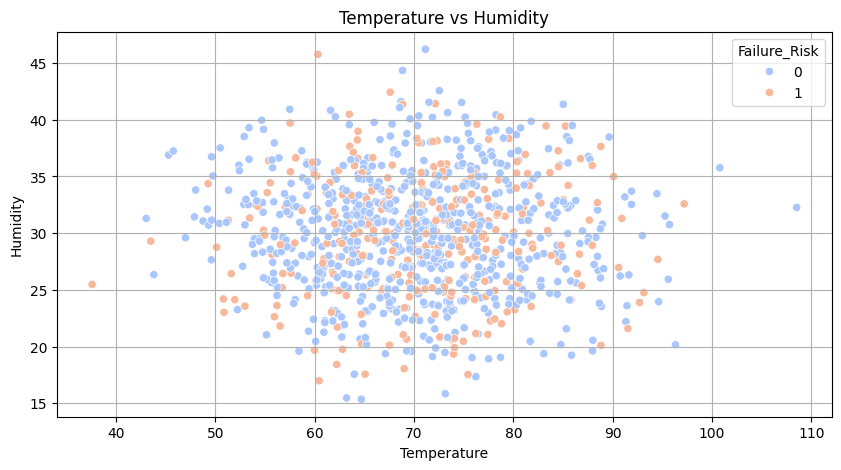

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Temperature",y="Humidity",hue="Failure_Risk",data=data,palette="coolwarm")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Temperature vs Humidity")
plt.grid()
plt.show()

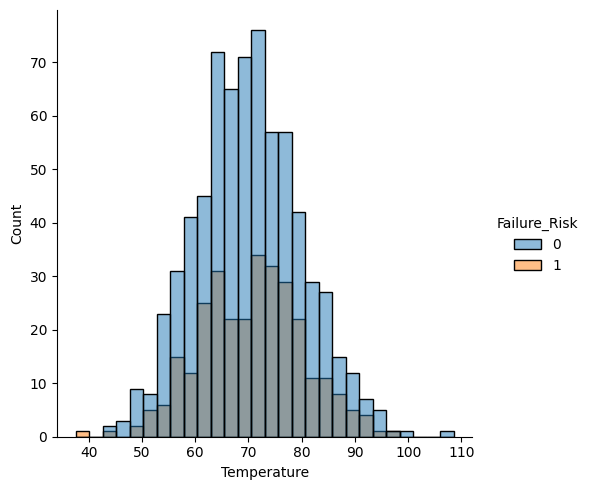

In [54]:
sns.displot(data,x="Temperature",hue="Failure_Risk")

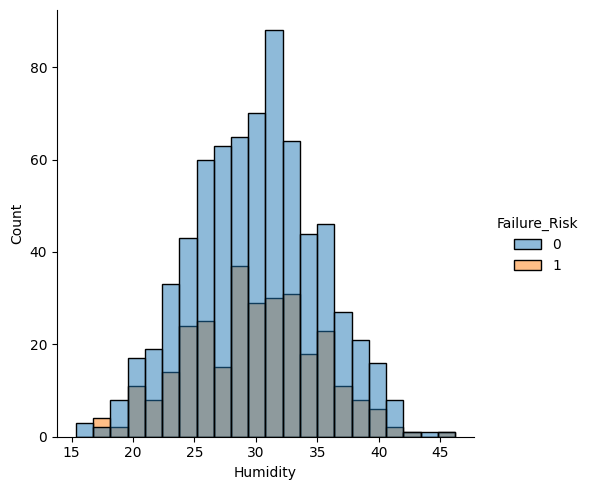

In [55]:
sns.displot(data,x="Humidity",hue="Failure_Risk")

In [31]:
y = data_processed.Failure_Risk
X = data_processed.drop(labels=["Failure_Risk"],axis=1)


In [66]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X=X,y=y)
mi_scores = pd.Series(data=mi_scores,name="MI-Scores",index=X.columns)
mi_scores.sort_values(ascending=False)

,MI-Scores
Power_Usage,0.005806
Drill,0.005133
Lathe,0.003713
Temperature,0.000000
Vibration,0.000000
Humidity,0.000000
Mill,0.000000
